List Dirs in R:

https://stackoverflow.com/questions/4749783/how-to-obtain-a-list-of-directories-within-a-directory-like-list-files-but-i

Powerlaw Fitting:

https://cran.r-project.org/web/packages/poweRlaw/vignettes/d_jss_paper.pdf

In [1]:
library("poweRlaw")

[1] "AdultIMDB: 2.00539640255602"
[1] "Emailcontacts: 1.81392575017562"


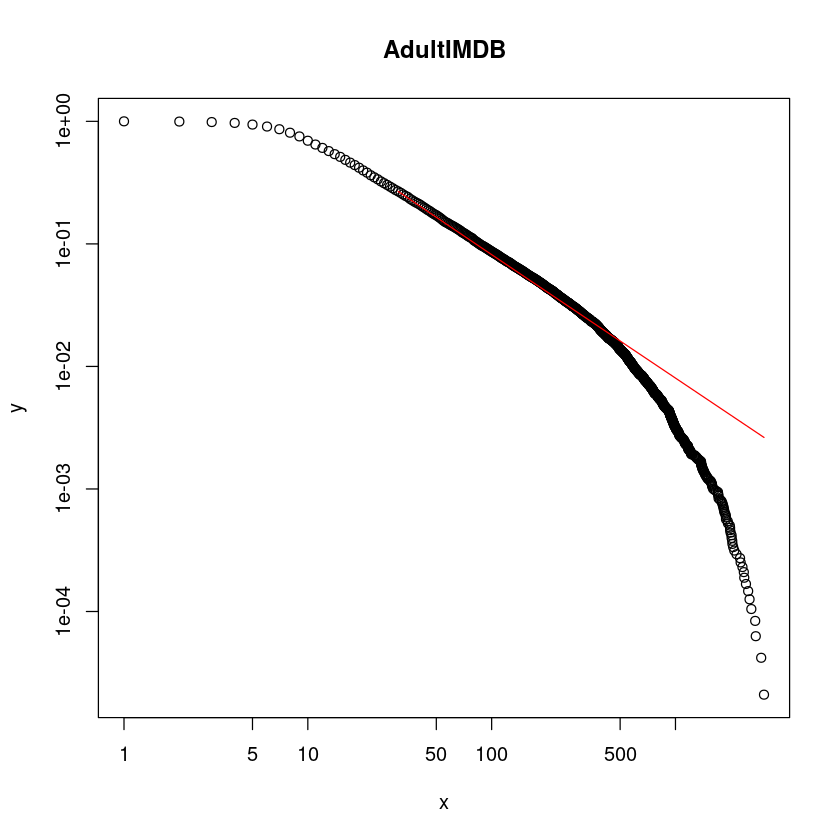

[1] "EmailEUCore: 2.79361727970689"


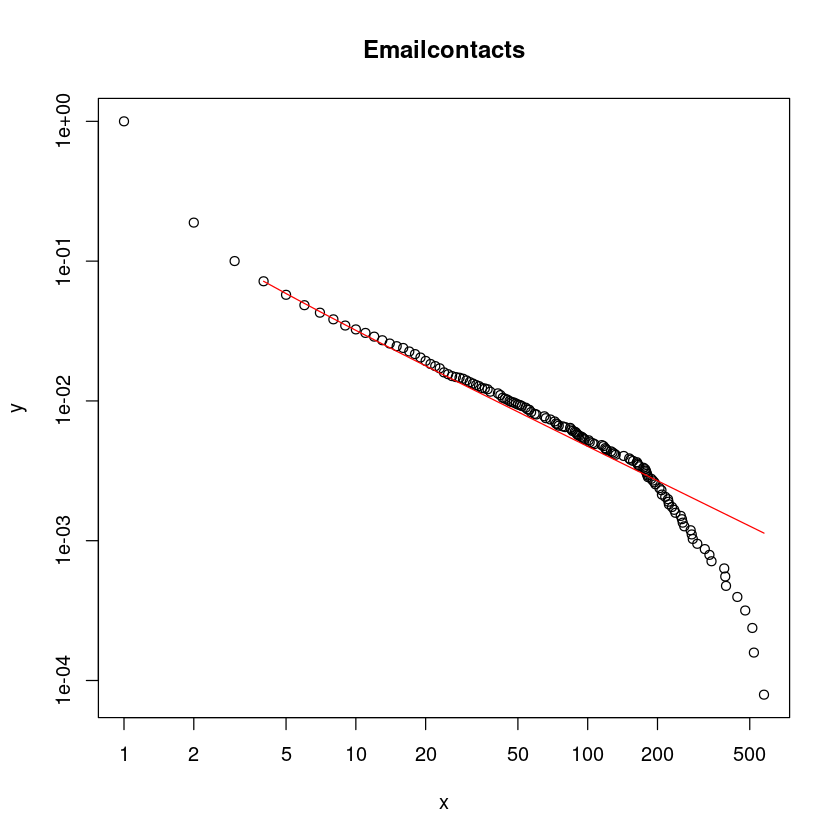

[1] "EmailURV: 6.76990284385649"


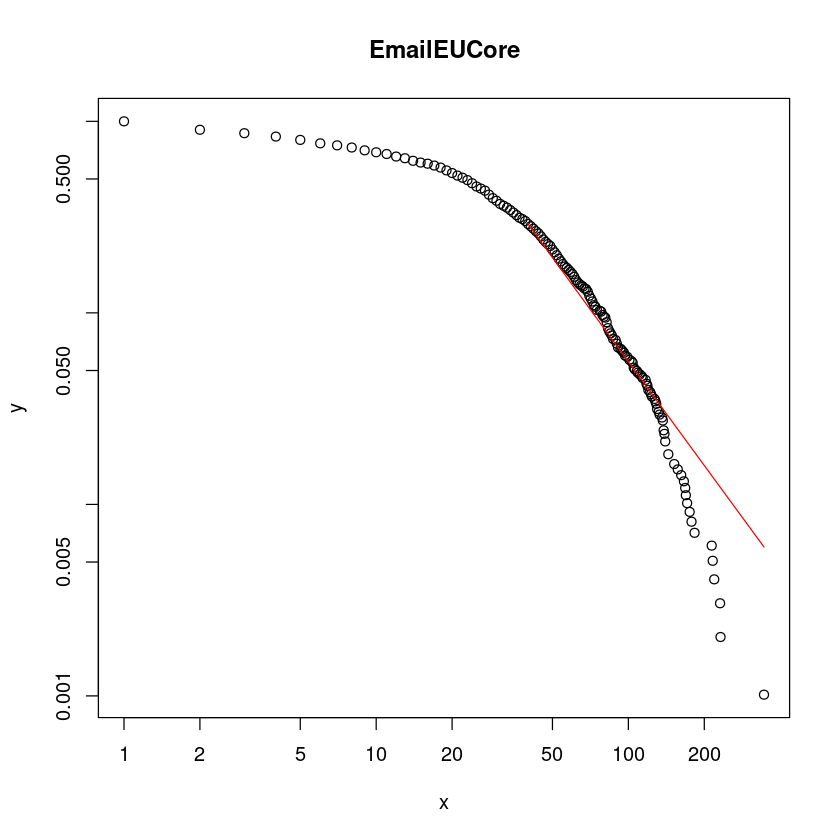

[1] "LesMiserables: 4.12516897617844"


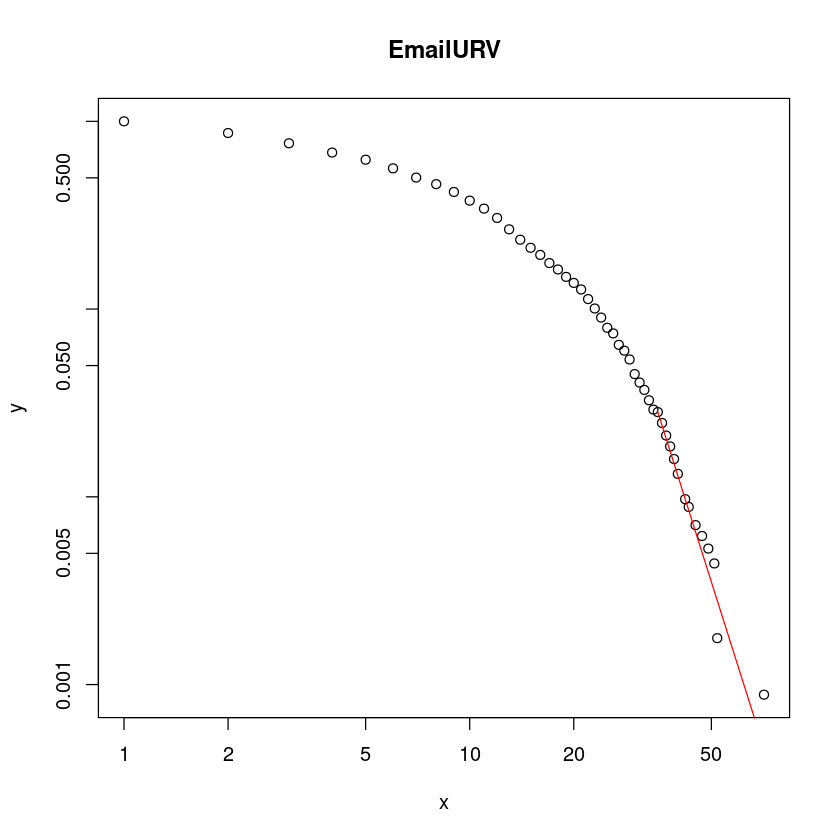

[1] "POK: 3.06406244038845"


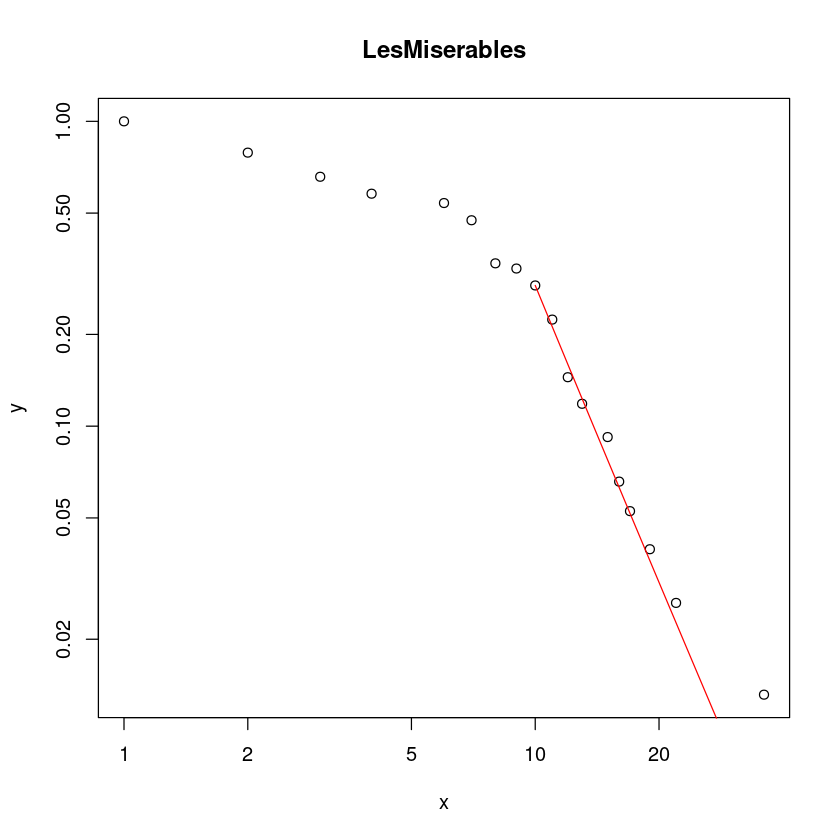

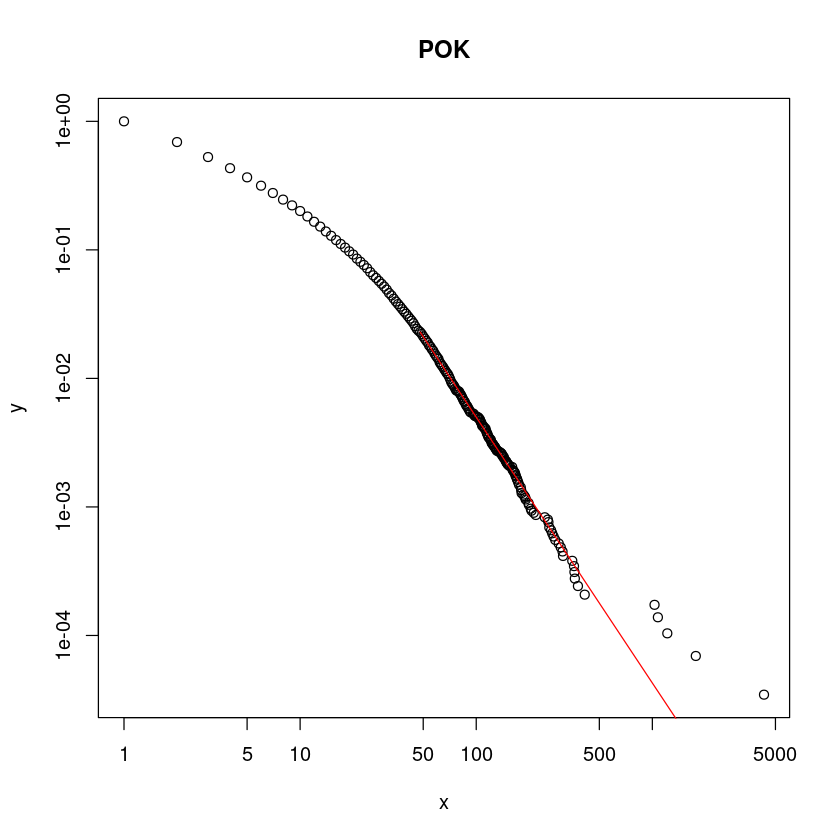

In [26]:
datasetpath <- "../../src/datasets"
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

delim = ","
for (i in list.dirs(datasetpath)){
    MyData <- read.csv(file.path(datasetpath,i,paste(i,".degree.csv", sep="")), 
                                 header=TRUE, sep=delim, 
                                 stringsAsFactors=FALSE)
    MyNewData <- as.integer(as.numeric(unlist(MyData)))
    pl_d <- displ$new(MyNewData)
    estimate_pars(pl_d)
    (est_pl_d <- estimate_xmin(pl_d))
    print(paste(i,est_pl_d$pars,sep=": "))
    pl_d$setXmin(est_pl_d)
    plot(pl_d, main=i)
    lines(pl_d, col=2)
}

In [3]:
data("moby", package="poweRlaw")

In [4]:
typeof(moby)

[1] "integer"

In [5]:
pl_m <- displ$new(moby)

In [6]:
pl_m$getXmin()

[1] 1

In [7]:
pl_m$getPars()

NULL

In [8]:
pl_m$setXmin(5)
pl_m$setPars(2)

In [9]:
estimate_pars(pl_m)

$pars
[1] 1.92588222789

$value
[1] 14872.5656872

$counts
function gradient 
       5        5 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

attr(,"class")
[1] "estimate_pars"

In [10]:
(est_pl <- estimate_xmin(pl_m))

$gof
[1] 0.00825263395384

$xmin
[1] 7

$pars
[1] 1.95272835312

$ntail
[1] 2958

$distance
[1] "ks"

attr(,"class")
[1] "estimate_xmin"

In [11]:
pl_m$setXmin(est_pl)

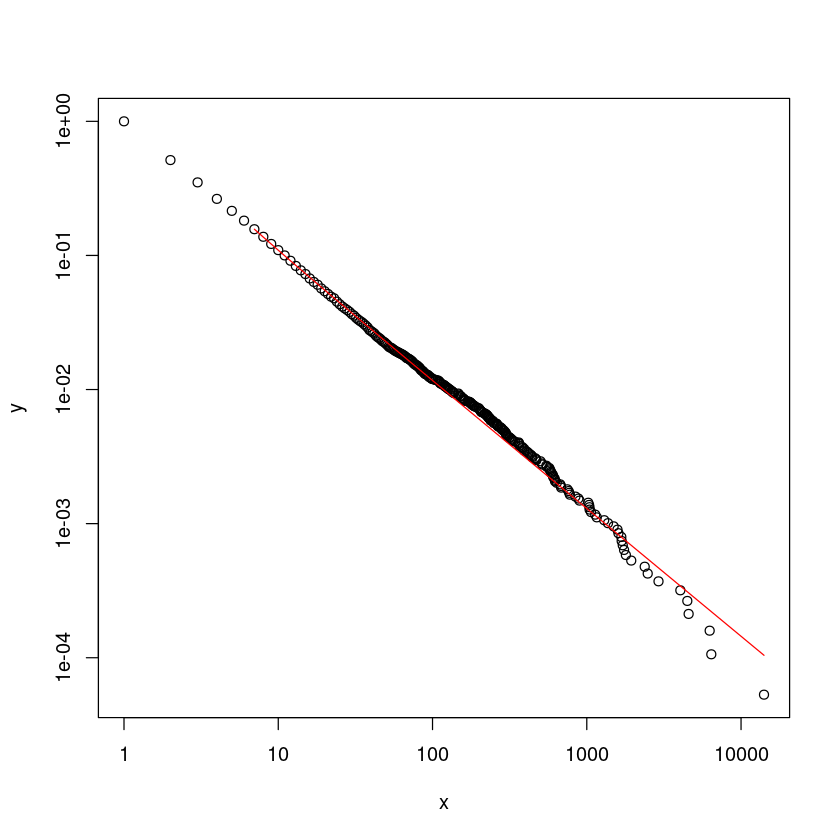

In [12]:
plot(pl_m)
lines(pl_m, col=2)

In [13]:
bs <- bootstrap(pl_m, no_of_sims = 300, threads = 8, seed = 1)

Expected total run time for 300 sims, using 8 threads is 50.5 seconds.


In [14]:
sd(bs$bootstraps[, 2])

[1] 2.30207845596

In [15]:
 sd(bs$bootstraps[, 3])

[1] 0.0245726691671

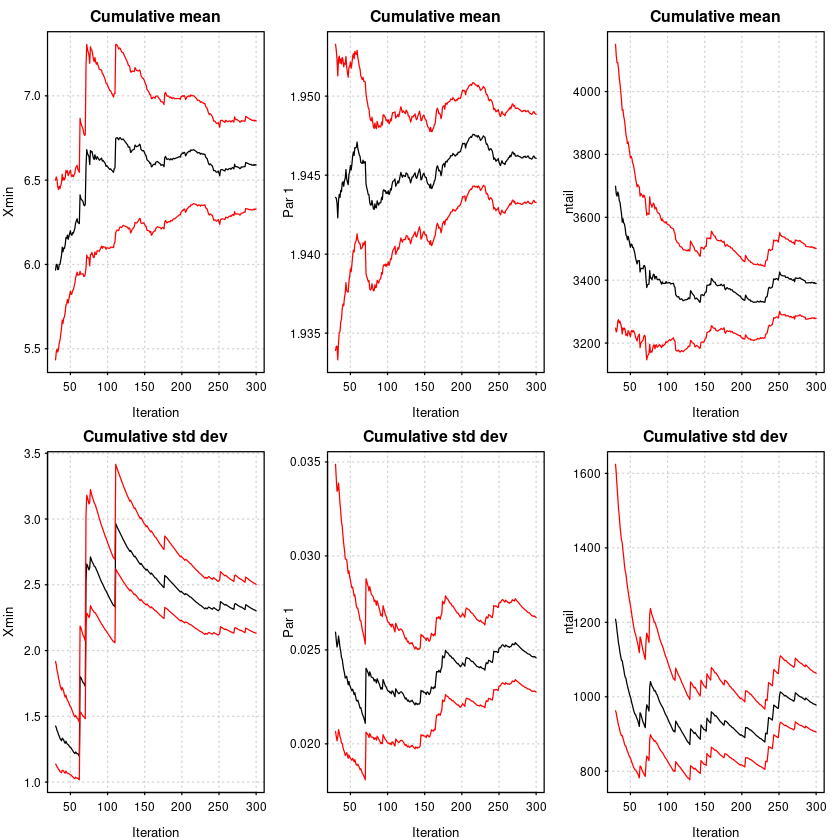

In [16]:
plot(bs, trim = 0.1)

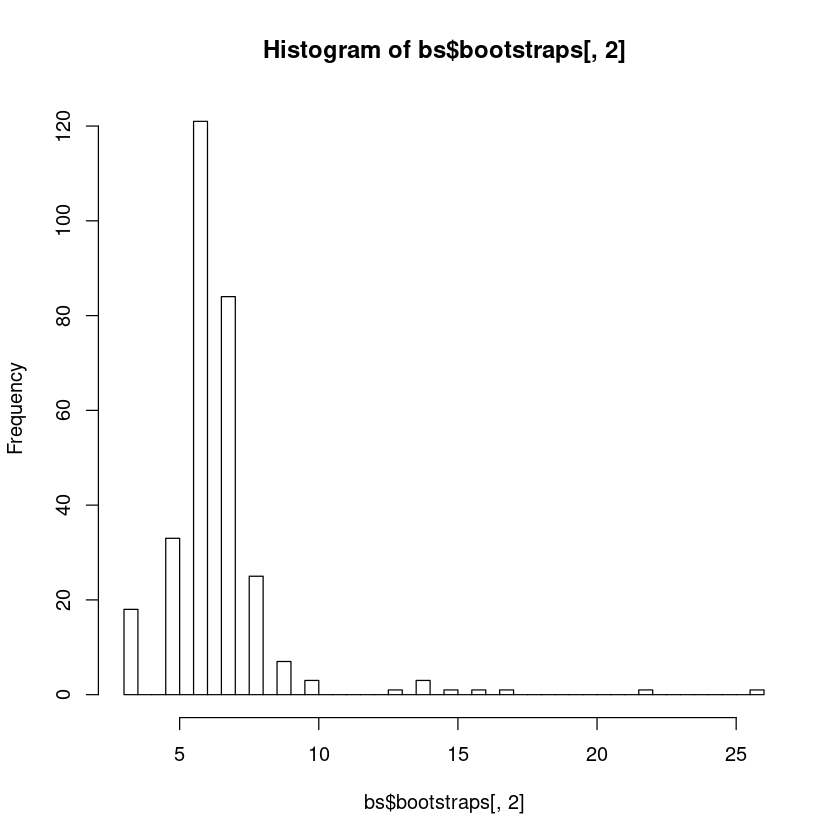

In [17]:
 hist(bs$bootstraps[, 2], breaks = "fd")

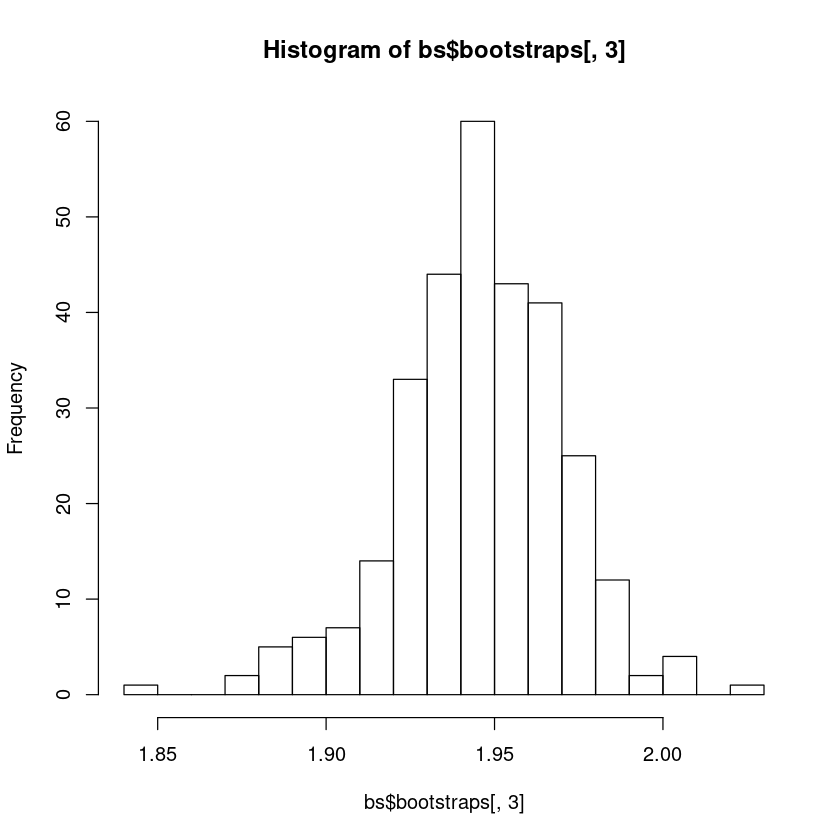

In [18]:
hist(bs$bootstraps[, 3], breaks = "fd")

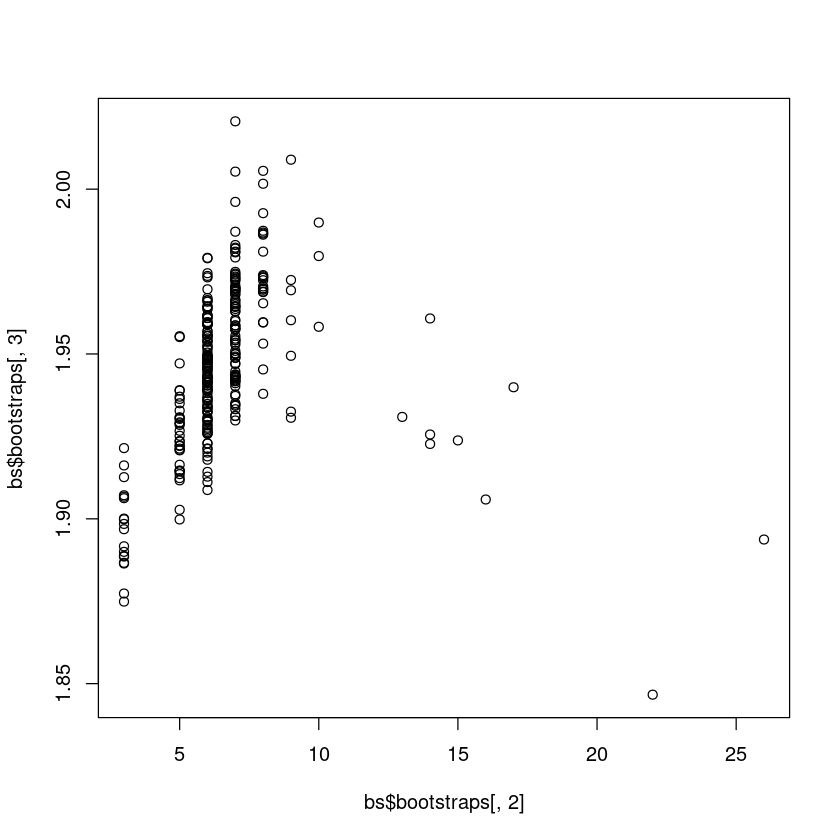

In [19]:
plot(bs$bootstraps[, 2], bs$bootstraps[, 3])